# Install important libraries

In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 777.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
import glob
from IPython.display import Image

In [ ]:
from roboflow import Roboflow

In [ ]:
key="7tT16zrGmusTx9RYn3Yu"

# Load dataset

The dataset we choose here is https://universe.roboflow.com/nicco-van-hamja-b1vxy


This one should make more sense
https://universe.roboflow.com/binus-if3z9/braille-classification/dataset/1

其中，center_x、center_y、width 和 height 是相对于图像宽度和高度的归一化值，范围在 0 到 1 之间。​这种格式在 YOLOv11 中被称为 “YOLOv11 PyTorch TXT” 格式。 ​
Roboflow
+1
Roboflow Blog
+1

尽管标注格式未变，YOLOv11 在模型架构和训练方法上引入了显著改进，提升了准确性和效率。 ​
labelformat.com
+2
labelformat.com
+2
Home
+2

因此，您可以继续使用 YOLOv8 的数据集格式来训练 YOLOv11 模型，无需重新标注数据。​如果您使用的是如 Roboflow 等工具，导出数据时选择 YOLOv11 PyTorch TXT 格式即可。

1. YOLO模型的比较

v8  small large xlarge
v11 small large xlarge  

2. 给定BBox, Stage1 model prediction Acc vs YOLO Acc


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=key)
#project = rf.workspace("nicco-van-hamja-b1vxy").project("braillify")
project = rf.workspace("binus-if3z9").project("braille-classification")
version = project.version(1)
dataset = version.download("yolov8") #YOLO v11 has the same label format

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Braille-Classification-1 in yolov8:: 100%|██████████| 7036/7036 [00:01<00:00, 4876.84it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Load model

https://docs.ultralytics.com/usage/python/



| Model Variant | YOLOv8 Parameters (M) | YOLOv11 Parameters (M) |
|---------------|-----------------------|------------------------|
| YOLOv8n / YOLO11n | 3.2 | 2.6 |
| YOLOv8s / YOLO11s | 11.2 | 9.4 |
| YOLOv8m / YOLO11m | 25.9 | 20.1 |
| YOLOv8l / YOLO11l | 43.7 | 25.3 |
| YOLOv8x / YOLO11x | 68.2 | 56.9 |

As observed, YOLOv11 models generally have fewer parameters compared to their YOLOv8 counterparts, indicating a more efficient architecture.


Here, in this project we compare the the V11 n and V8 n

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [ ]:
model_v11 = YOLO("yolo11n.pt")  # pass any model type
model_v8 = YOLO("yolov8n.pt")  # pass any model type


100%|██████████| 5.35M/5.35M [00:00<00:00, 64.7MB/s]


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.7MB/s]


# Train the model

### V8 N

In [ ]:
model_v8.train(data='/content/Braille-Classification-1/data.yaml', epochs=10)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Braille-Classification-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /content/Braille-Classification-1/train/labels.cache... 2809 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2809/2809 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1086, len(boxes) = 50386. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 658.3±315.6 MB/s, size: 29.5 KB)


val: Scanning /content/Braille-Classification-1/valid/labels.cache... 352 images, 0 backgrounds, 0 corrupt: 100%|██████████| 352/352 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 112, len(boxes) = 6898. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.78G      2.037      4.216      1.586        119        640: 100%|██████████| 176/176 [00:52<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        352       6898      0.382      0.111     0.0777     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.66G      1.484      2.717      1.202        209        640: 100%|██████████| 176/176 [00:49<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        352       6898      0.464      0.387       0.37      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.67G      1.348      1.989      1.137        143        640: 100%|██████████| 176/176 [00:46<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        352       6898      0.545      0.543      0.548      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.68G      1.277      1.672      1.117        196        640: 100%|██████████| 176/176 [00:47<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        352       6898      0.643      0.635      0.684      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.69G      1.214      1.474      1.088         79        640: 100%|██████████| 176/176 [00:47<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        352       6898       0.72      0.699      0.756      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       3.7G      1.176      1.351      1.074        138        640: 100%|██████████| 176/176 [00:47<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]

                   all        352       6898      0.712      0.754      0.776      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       3.7G      1.146      1.275      1.058        145        640: 100%|██████████| 176/176 [00:49<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.03it/s]

                   all        352       6898      0.726      0.761      0.801      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       3.7G      1.117      1.213      1.047        130        640: 100%|██████████| 176/176 [00:48<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.91it/s]

                   all        352       6898      0.751      0.764      0.801      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       3.7G      1.099      1.186      1.034        175        640: 100%|██████████| 176/176 [00:48<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]

                   all        352       6898      0.747      0.795      0.826      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       3.7G      1.085      1.151      1.031        166        640: 100%|██████████| 176/176 [00:47<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.81it/s]

                   all        352       6898      0.752      0.793      0.828      0.597



10 epochs completed in 0.148 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,718 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


                   all        352       6898      0.752      0.793      0.828      0.598
                     A        228        516      0.734      0.878      0.875      0.614
                     B         85        125      0.625      0.744      0.729      0.524
                     C        117        176      0.804      0.858      0.872      0.625
                     D        190        383      0.725       0.89      0.856      0.607
                     E        289        807      0.701      0.921      0.886      0.651
                     F         97        128      0.666      0.469      0.672      0.492
                     G        113        129      0.815      0.938      0.914       0.68
                     H        224        316      0.791      0.949      0.953      0.724
                     I        173        345      0.599      0.707      0.729      0.534
                     J         36         44      0.744      0.409      0.615      0.375
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbf7b3fe110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

In [ ]:
Image(filename="/content/runs/detect/train/results.png")

### V11 N


In [ ]:
model_v11.train(data='/content/Braille-Classification-1/data.yaml', epochs=10)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Braille-Classification-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /content/Braille-Classification-1/train/labels.cache... 2809 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2809/2809 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1086, len(boxes) = 50386. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 450.4±265.0 MB/s, size: 29.5 KB)


val: Scanning /content/Braille-Classification-1/valid/labels.cache... 352 images, 0 backgrounds, 0 corrupt: 100%|██████████| 352/352 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 112, len(boxes) = 6898. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.13G      1.986      4.468      1.534        119        640: 100%|██████████| 176/176 [00:57<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]

                   all        352       6898     0.0274      0.342     0.0475     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.01G      1.471      3.232      1.175        209        640: 100%|██████████| 176/176 [00:52<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        352       6898      0.382      0.248      0.221      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.04G      1.367      2.418      1.129        143        640: 100%|██████████| 176/176 [00:52<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.70it/s]

                   all        352       6898      0.397      0.339       0.34      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.04G      1.284      1.997      1.108        196        640: 100%|██████████| 176/176 [00:52<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]

                   all        352       6898      0.566      0.479      0.507      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.04G      1.216      1.716      1.073         79        640: 100%|██████████| 176/176 [00:52<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.83it/s]

                   all        352       6898      0.574      0.582      0.624      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.04G      1.175      1.542      1.056        138        640: 100%|██████████| 176/176 [00:50<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        352       6898      0.674      0.611      0.662      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.05G      1.144      1.429       1.04        145        640: 100%|██████████| 176/176 [00:49<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        352       6898      0.632      0.686      0.701      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.05G      1.113      1.346      1.029        130        640: 100%|██████████| 176/176 [00:50<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]

                   all        352       6898      0.674      0.702      0.732      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.05G      1.094      1.308      1.018        175        640: 100%|██████████| 176/176 [00:51<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]

                   all        352       6898      0.707      0.717      0.763      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.06G      1.071      1.268      1.011        166        640: 100%|██████████| 176/176 [00:50<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.27it/s]

                   all        352       6898      0.686      0.727      0.764      0.551



10 epochs completed in 0.159 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.44it/s]


                   all        352       6898      0.686      0.726      0.764      0.551
                     A        228        516      0.726      0.824      0.856      0.605
                     B         85        125      0.626      0.496      0.624      0.452
                     C        117        176      0.777      0.824      0.863      0.626
                     D        190        383      0.713       0.89      0.853      0.603
                     E        289        807      0.681      0.918      0.852      0.628
                     F         97        128      0.545      0.562      0.658      0.481
                     G        113        129      0.726      0.907      0.886      0.659
                     H        224        316      0.752       0.94      0.922      0.692
                     I        173        345      0.496      0.614      0.641      0.453
                     J         36         44      0.454      0.159      0.283      0.177
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbf7aee4690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

In [ ]:
!zip -r runs.zip runs/

	zip warning: name not matched: runs/

zip error: Nothing to do! (try: zip -r runs.zip . -i runs/)


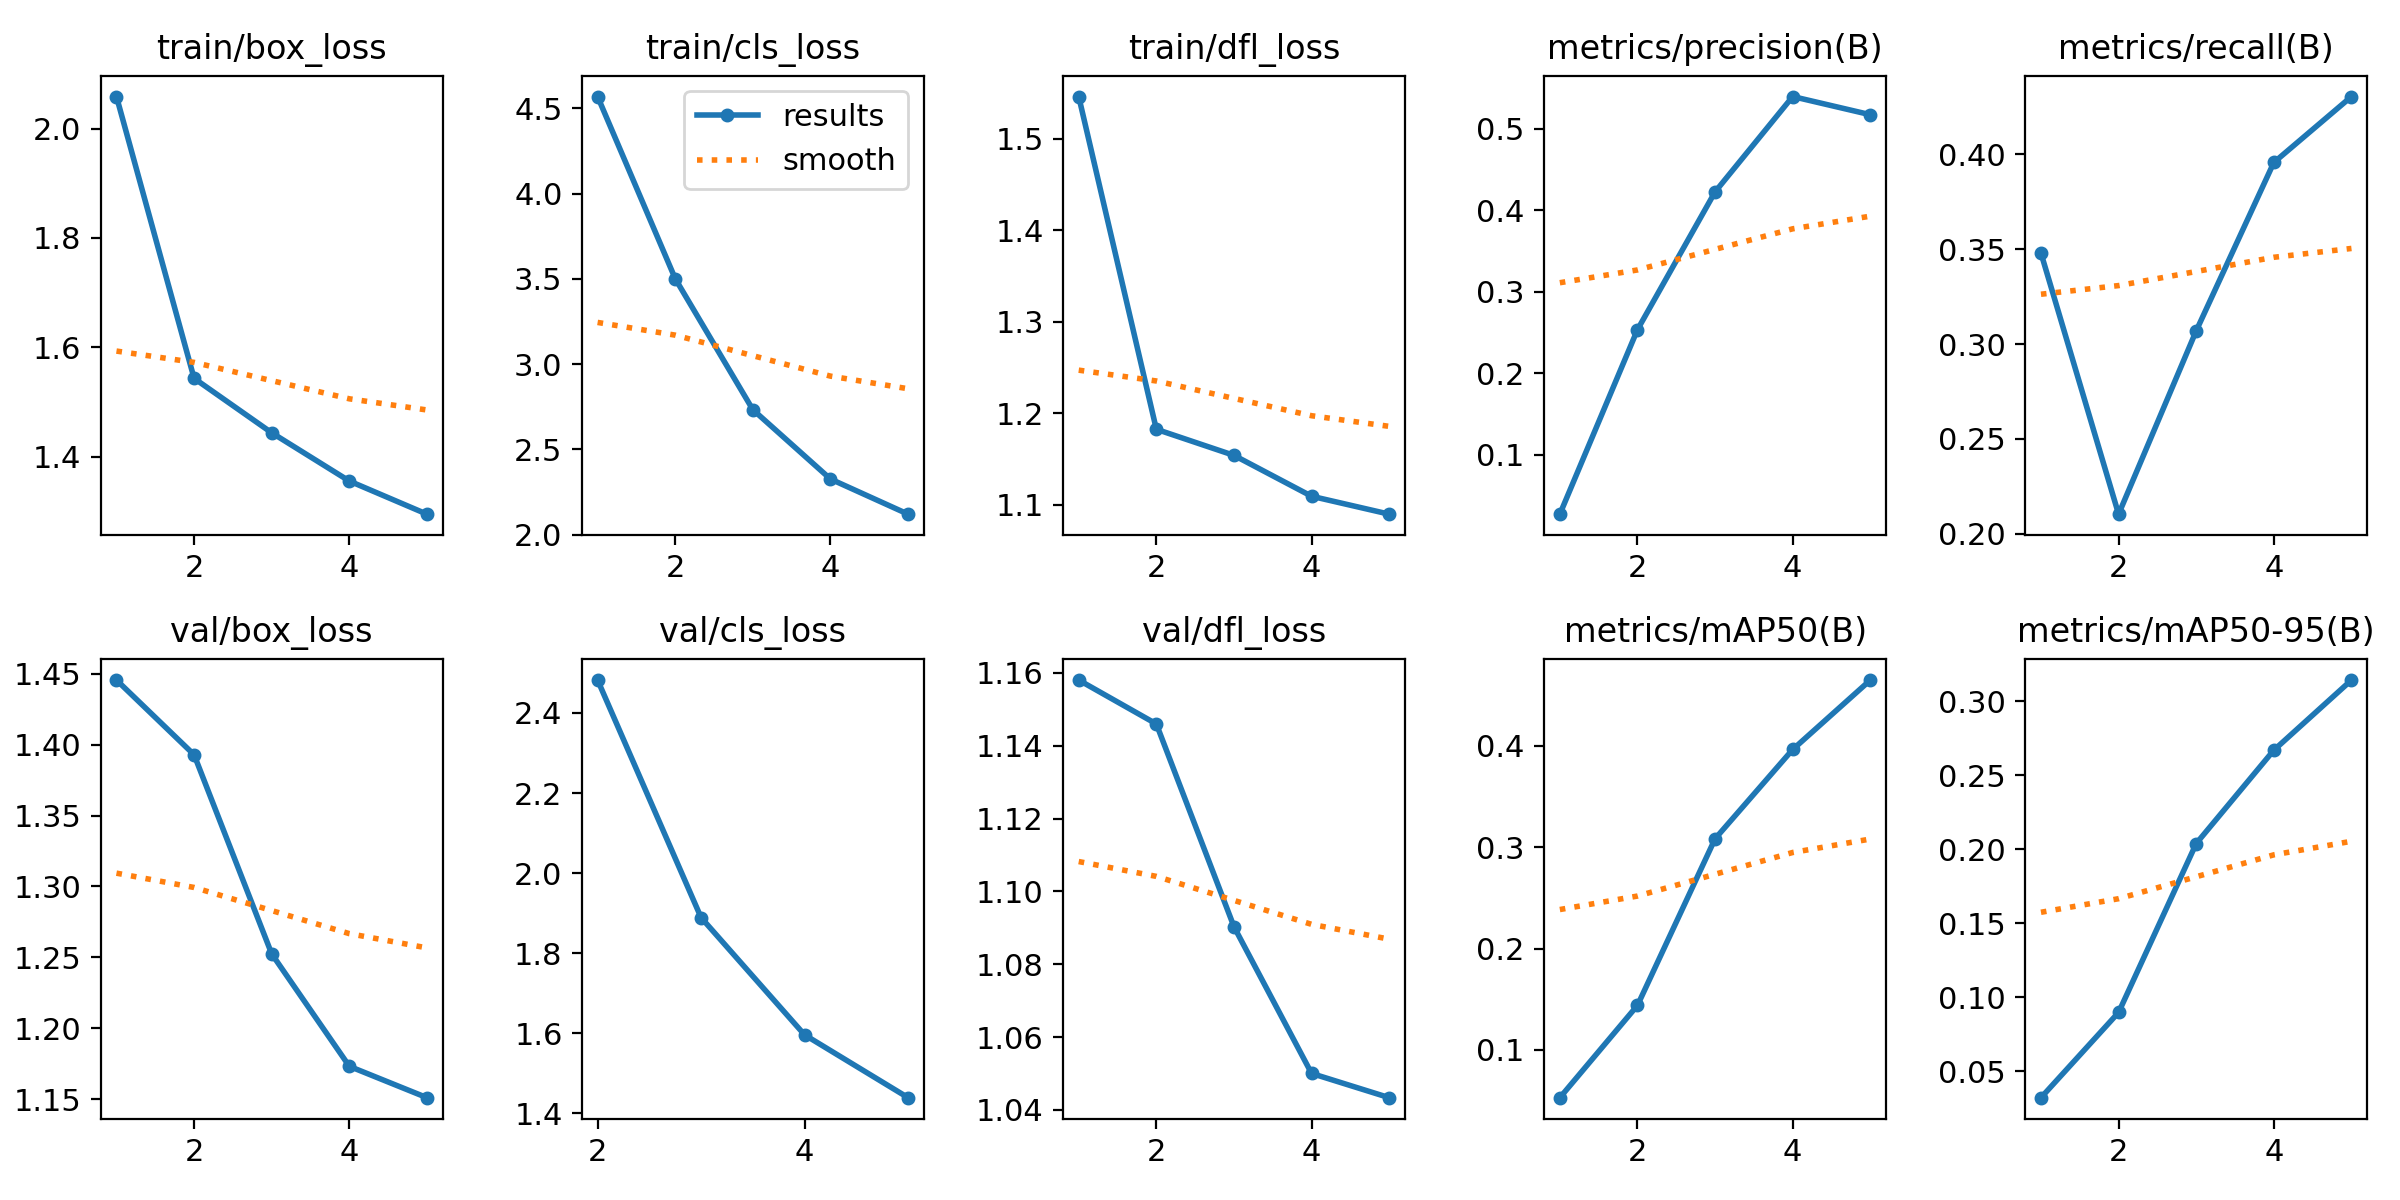

In [ ]:
Image(filename="/content/runs/detect/train4/results.png")

# Results

 Interpret the Results
Key metrics to consider:

Precision: The proportion of correct positive predictions.

Recall: The proportion of actual positives correctly identified.

mAP@0.5: Mean Average Precision at an IoU threshold of 0.5.

mAP@0.5:0.95: Average mAP across IoU thresholds from 0.5 to 0.95 in increments of 0.05.

In [ ]:
!unzip /content/runs10.zip

Archive:  /content/runs10.zip
   creating: runs/detect/
   creating: runs/detect/train2/
  inflating: runs/detect/train2/P_curve.png  
  inflating: runs/detect/train2/results.csv  
  inflating: runs/detect/train2/labels_correlogram.jpg  
  inflating: runs/detect/train2/PR_curve.png  
  inflating: runs/detect/train2/val_batch2_labels.jpg  
  inflating: runs/detect/train2/labels.jpg  
  inflating: runs/detect/train2/F1_curve.png  
  inflating: runs/detect/train2/confusion_matrix.png  
   creating: runs/detect/train2/weights/
  inflating: runs/detect/train2/weights/best.pt  
  inflating: runs/detect/train2/weights/last.pt  
  inflating: runs/detect/train2/train_batch1.jpg  
  inflating: runs/detect/train2/args.yaml  
  inflating: runs/detect/train2/confusion_matrix_normalized.png  
  inflating: runs/detect/train2/R_curve.png  
  inflating: runs/detect/train2/val_batch1_labels.jpg  
  inflating: runs/detect/train2/train_batch0.jpg  
  inflating: runs/detect/train2/results.png  
  inflating

In [ ]:
model_v11 = YOLO("/content/runs/detect/train2/weights/best.pt")

In [ ]:
!zip -r test_result.zip runs/detect/val6/

  adding: runs/detect/val6/ (stored 0%)
  adding: runs/detect/val6/F1_curve.png (deflated 10%)
  adding: runs/detect/val6/R_curve.png (deflated 10%)
  adding: runs/detect/val6/labels/ (stored 0%)
  adding: runs/detect/val6/labels/IMG20230421115016_jpg.rf.3c7bf479f4c809ee865b20a70c644da6.txt (deflated 65%)
  adding: runs/detect/val6/labels/2321_jpg.rf.786168ce998f801746905124b94b7188.txt (deflated 68%)
  adding: runs/detect/val6/labels/db2_png_jpg.rf.954ea5e7059f5fa780222e6a68d31614.txt (deflated 65%)
  adding: runs/detect/val6/labels/4565_jpg.rf.a0c69f4aee60116e880c504574b4131e.txt (deflated 71%)
  adding: runs/detect/val6/labels/885_jpg.rf.68c80a7c3e22a220b312170a959c2489.txt (deflated 71%)
  adding: runs/detect/val6/labels/4025_jpg.rf.0cc45e99bfe862b4b10cb91775d625c5.txt (deflated 71%)
  adding: runs/detect/val6/labels/2915_jpg.rf.fa49ddf724ce2b087f3f2da315c85a5c.txt (deflated 67%)
  adding: runs/detect/val6/labels/2745_jpg.rf.9e446011ecde1bc67352cf1f452780c2.txt (deflated 68%)
  add

refer to https://docs.ultralytics.com/modes/val/#arguments-for-yolo-model-validation

1. get cropped images
2. get the bbox
3. get the ground truth

In [ ]:
# Validate the model on the test dataset
metrics = model_v11.val(data='/content/Braille-Classification-1/data_test.yaml', save_txt=True, save_json=True,save_crop = True,save_conf=True)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 988.4±515.4 MB/s, size: 35.7 KB)


val: Scanning /content/Braille-Classification-1/test/labels.cache... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 164, len(boxes) = 6554. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [02:15<00:00,  6.17s/it]


                   all        351       6554      0.679      0.728      0.757      0.543
                     A        202        474      0.674      0.764      0.796      0.558
                     B        102        145       0.68       0.49      0.606      0.397
                     C        124        176      0.761      0.835      0.897      0.652
                     D        189        373      0.707      0.867      0.847      0.586
                     E        271        733      0.696      0.909      0.864       0.63
                     F        101        121      0.478      0.579       0.64       0.48
                     G        121        160      0.792      0.905      0.901      0.655
                     H        226        319      0.767      0.934      0.911      0.673
                     I        161        300      0.526        0.7       0.67      0.435
                     J         43         50      0.582      0.251      0.386      0.277
                     


image 1/1 /content/Braille-Classification-1/test/images/0_jpg.rf.1a59c0699415ffc7b6f679836a736d9b.jpg: 640x640 2 Ds, 3 Es, 1 G, 1 L, 2 Ns, 2 Os, 1 S, 561.3ms
Speed: 13.1ms preprocess, 561.3ms inference, 39.7ms postprocess per image at shape (1, 3, 640, 640)


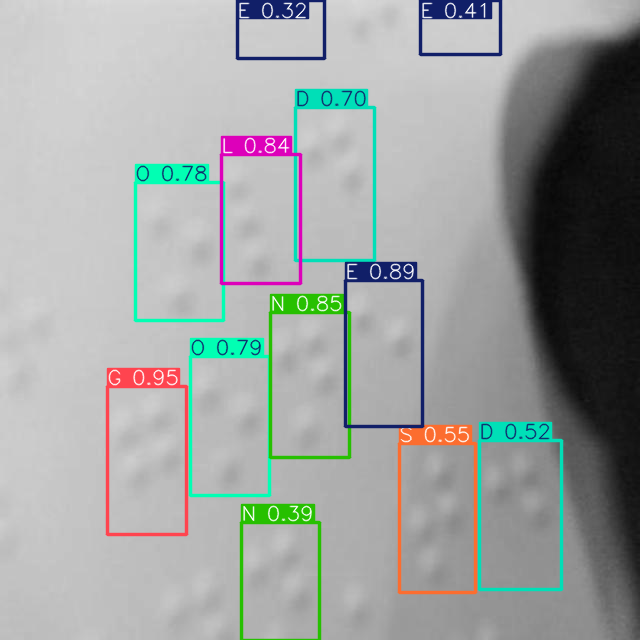

In [ ]:
# Perform object detection on an image
results = model_v11("/content/Braille-Classification-1/test/images/0_jpg.rf.1a59c0699415ffc7b6f679836a736d9b.jpg")

# Visualize the results
for result in results:
    result.show()

In [ ]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
obb: None
orig_img: array([[[204, 204, 204],
        [204, 204, 204],
        [205, 205, 205],
        ...,
        [166, 166, 166],
        [164, 164, 164],
        [163, 163, 163]],

       [[204, 204, 204],
        [204, 204, 204],
        [205, 205, 205],
        ...,
        [165, 165, 165],
        [164, 164, 164],
        [163, 163, 163]],

       [[204, 204, 204],
        [204, 204, 204],
        [205, 205, 205],
        ...,
        [165, 165, 165],
        [164, 164, 164],
        [163, 163, 163]],

       ...,

       [[189, 189, 189],
        [189, 189, 189],
        [189, 189, 189],
        ...,
        [ 83,  83

# Predictions

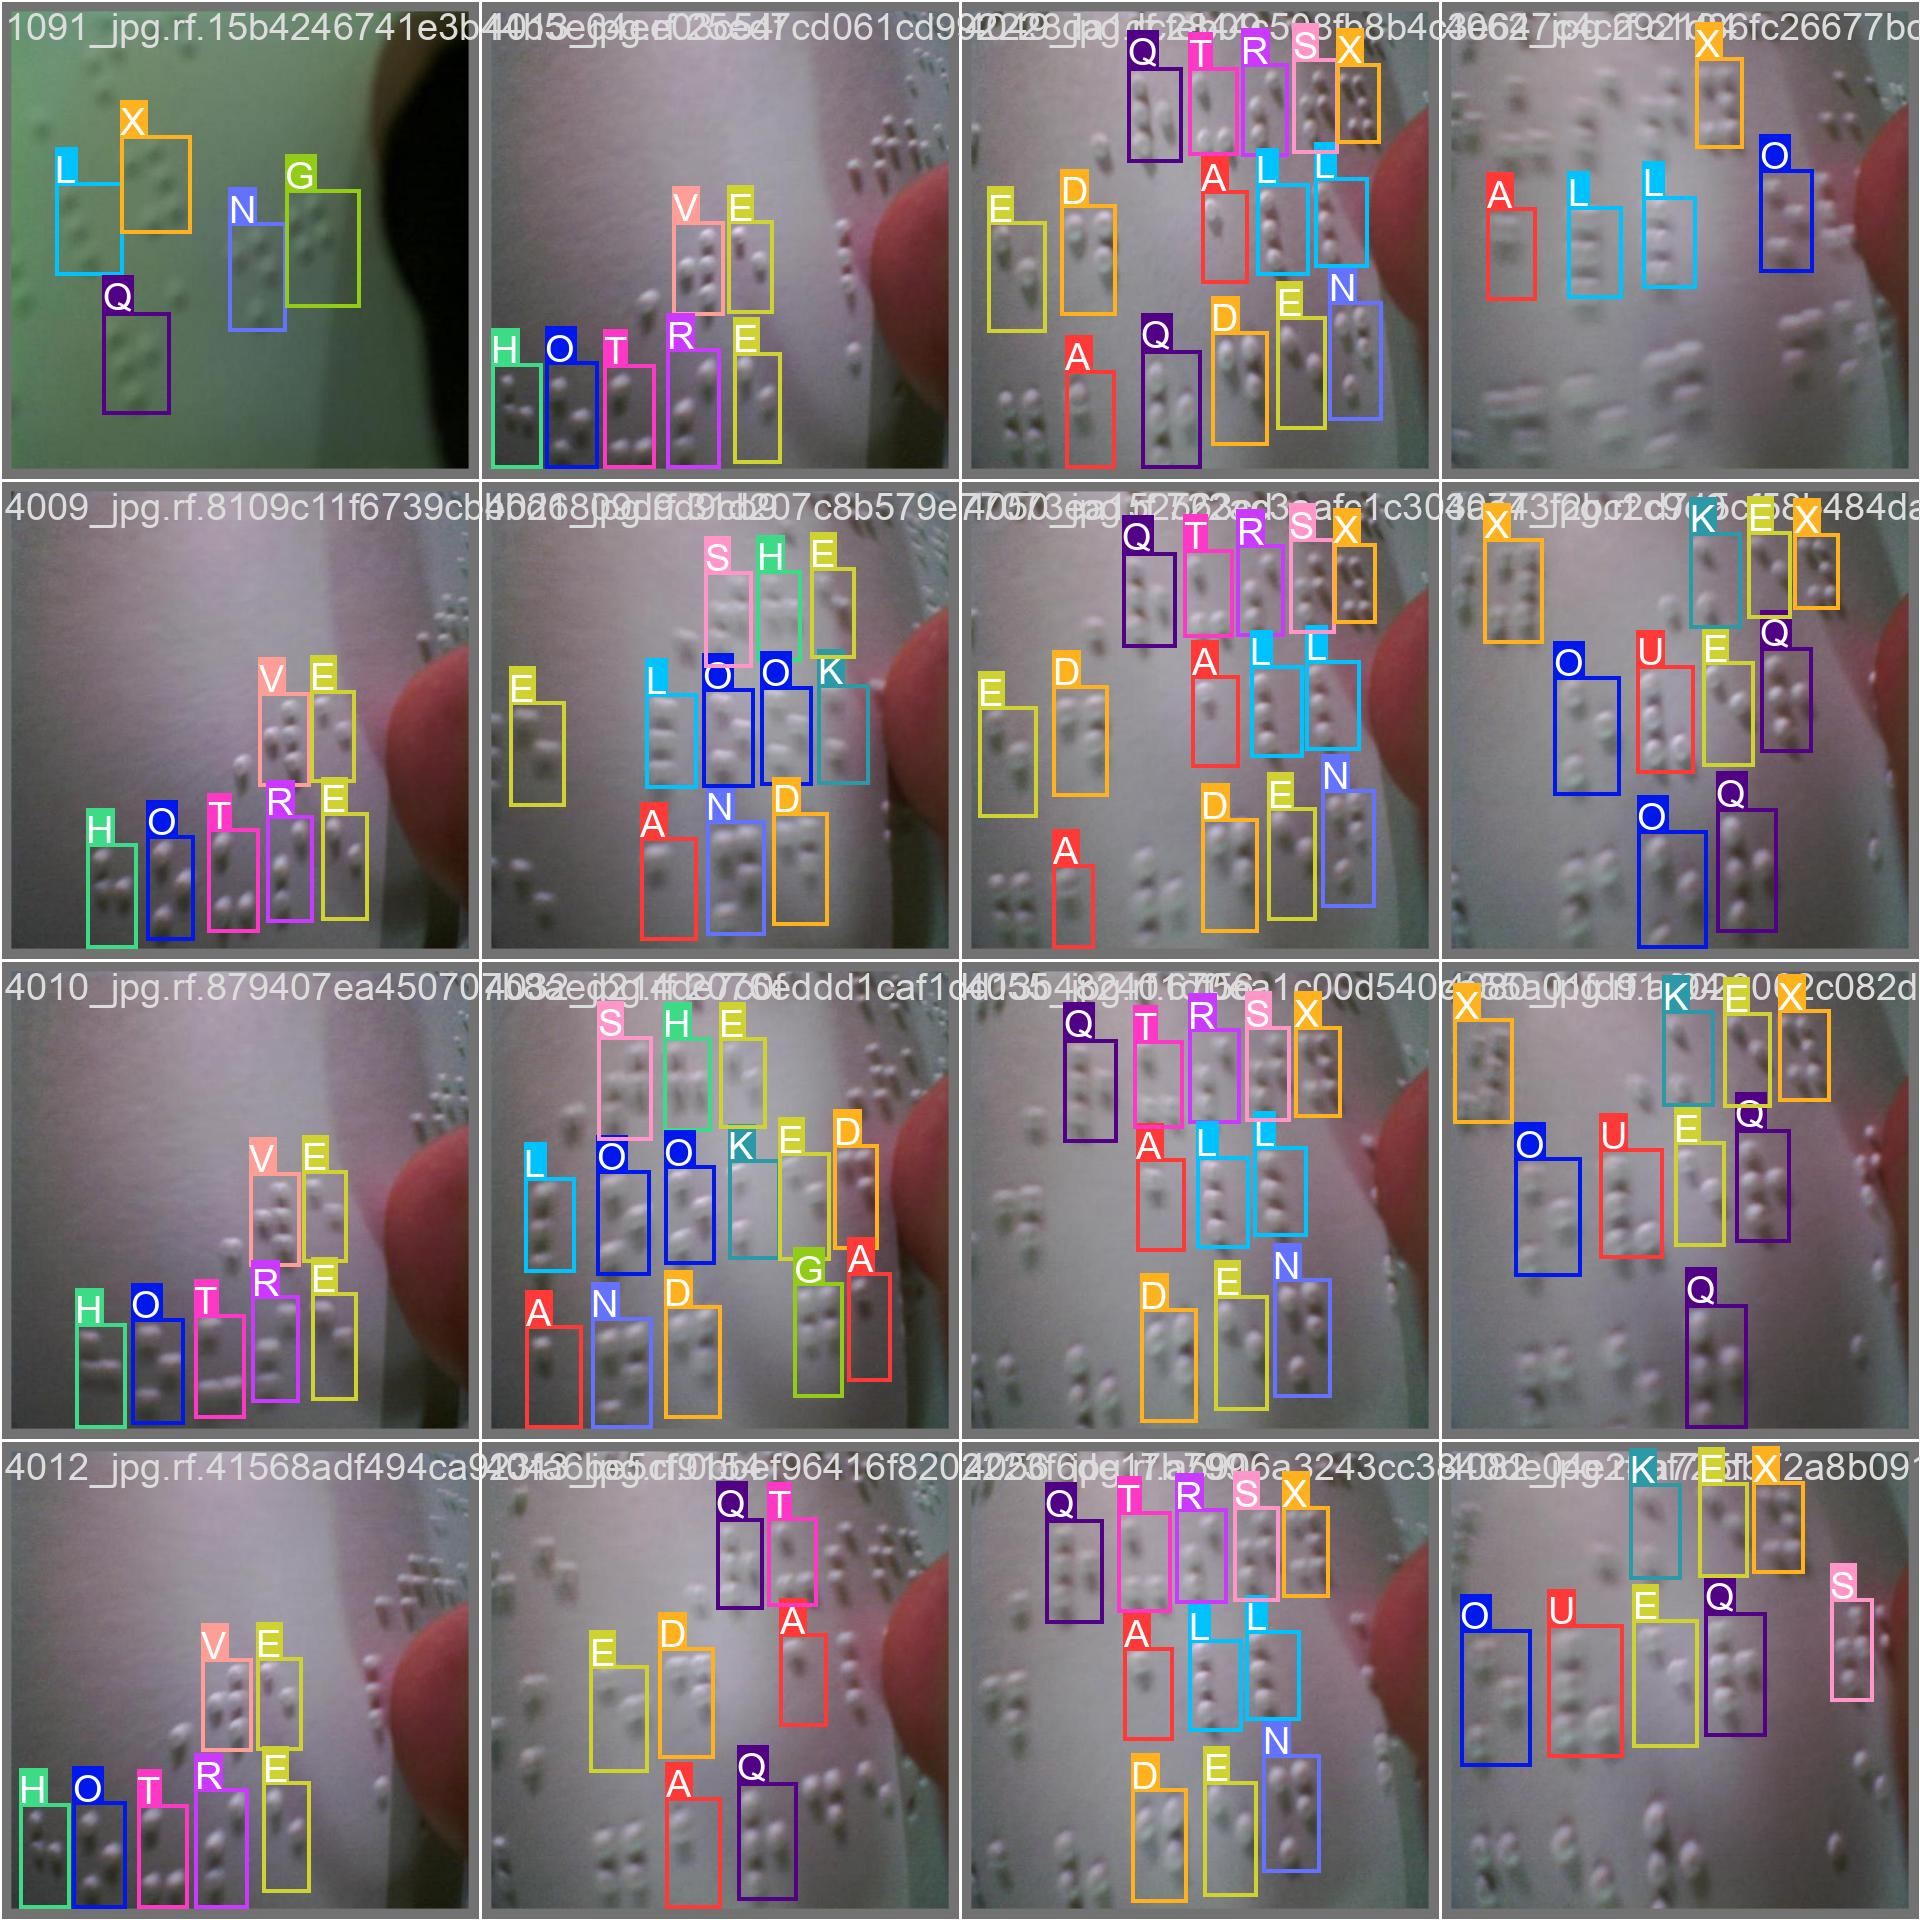

In [ ]:
Image(filename="/content/runs/detect/val/val_batch0_labels.jpg")

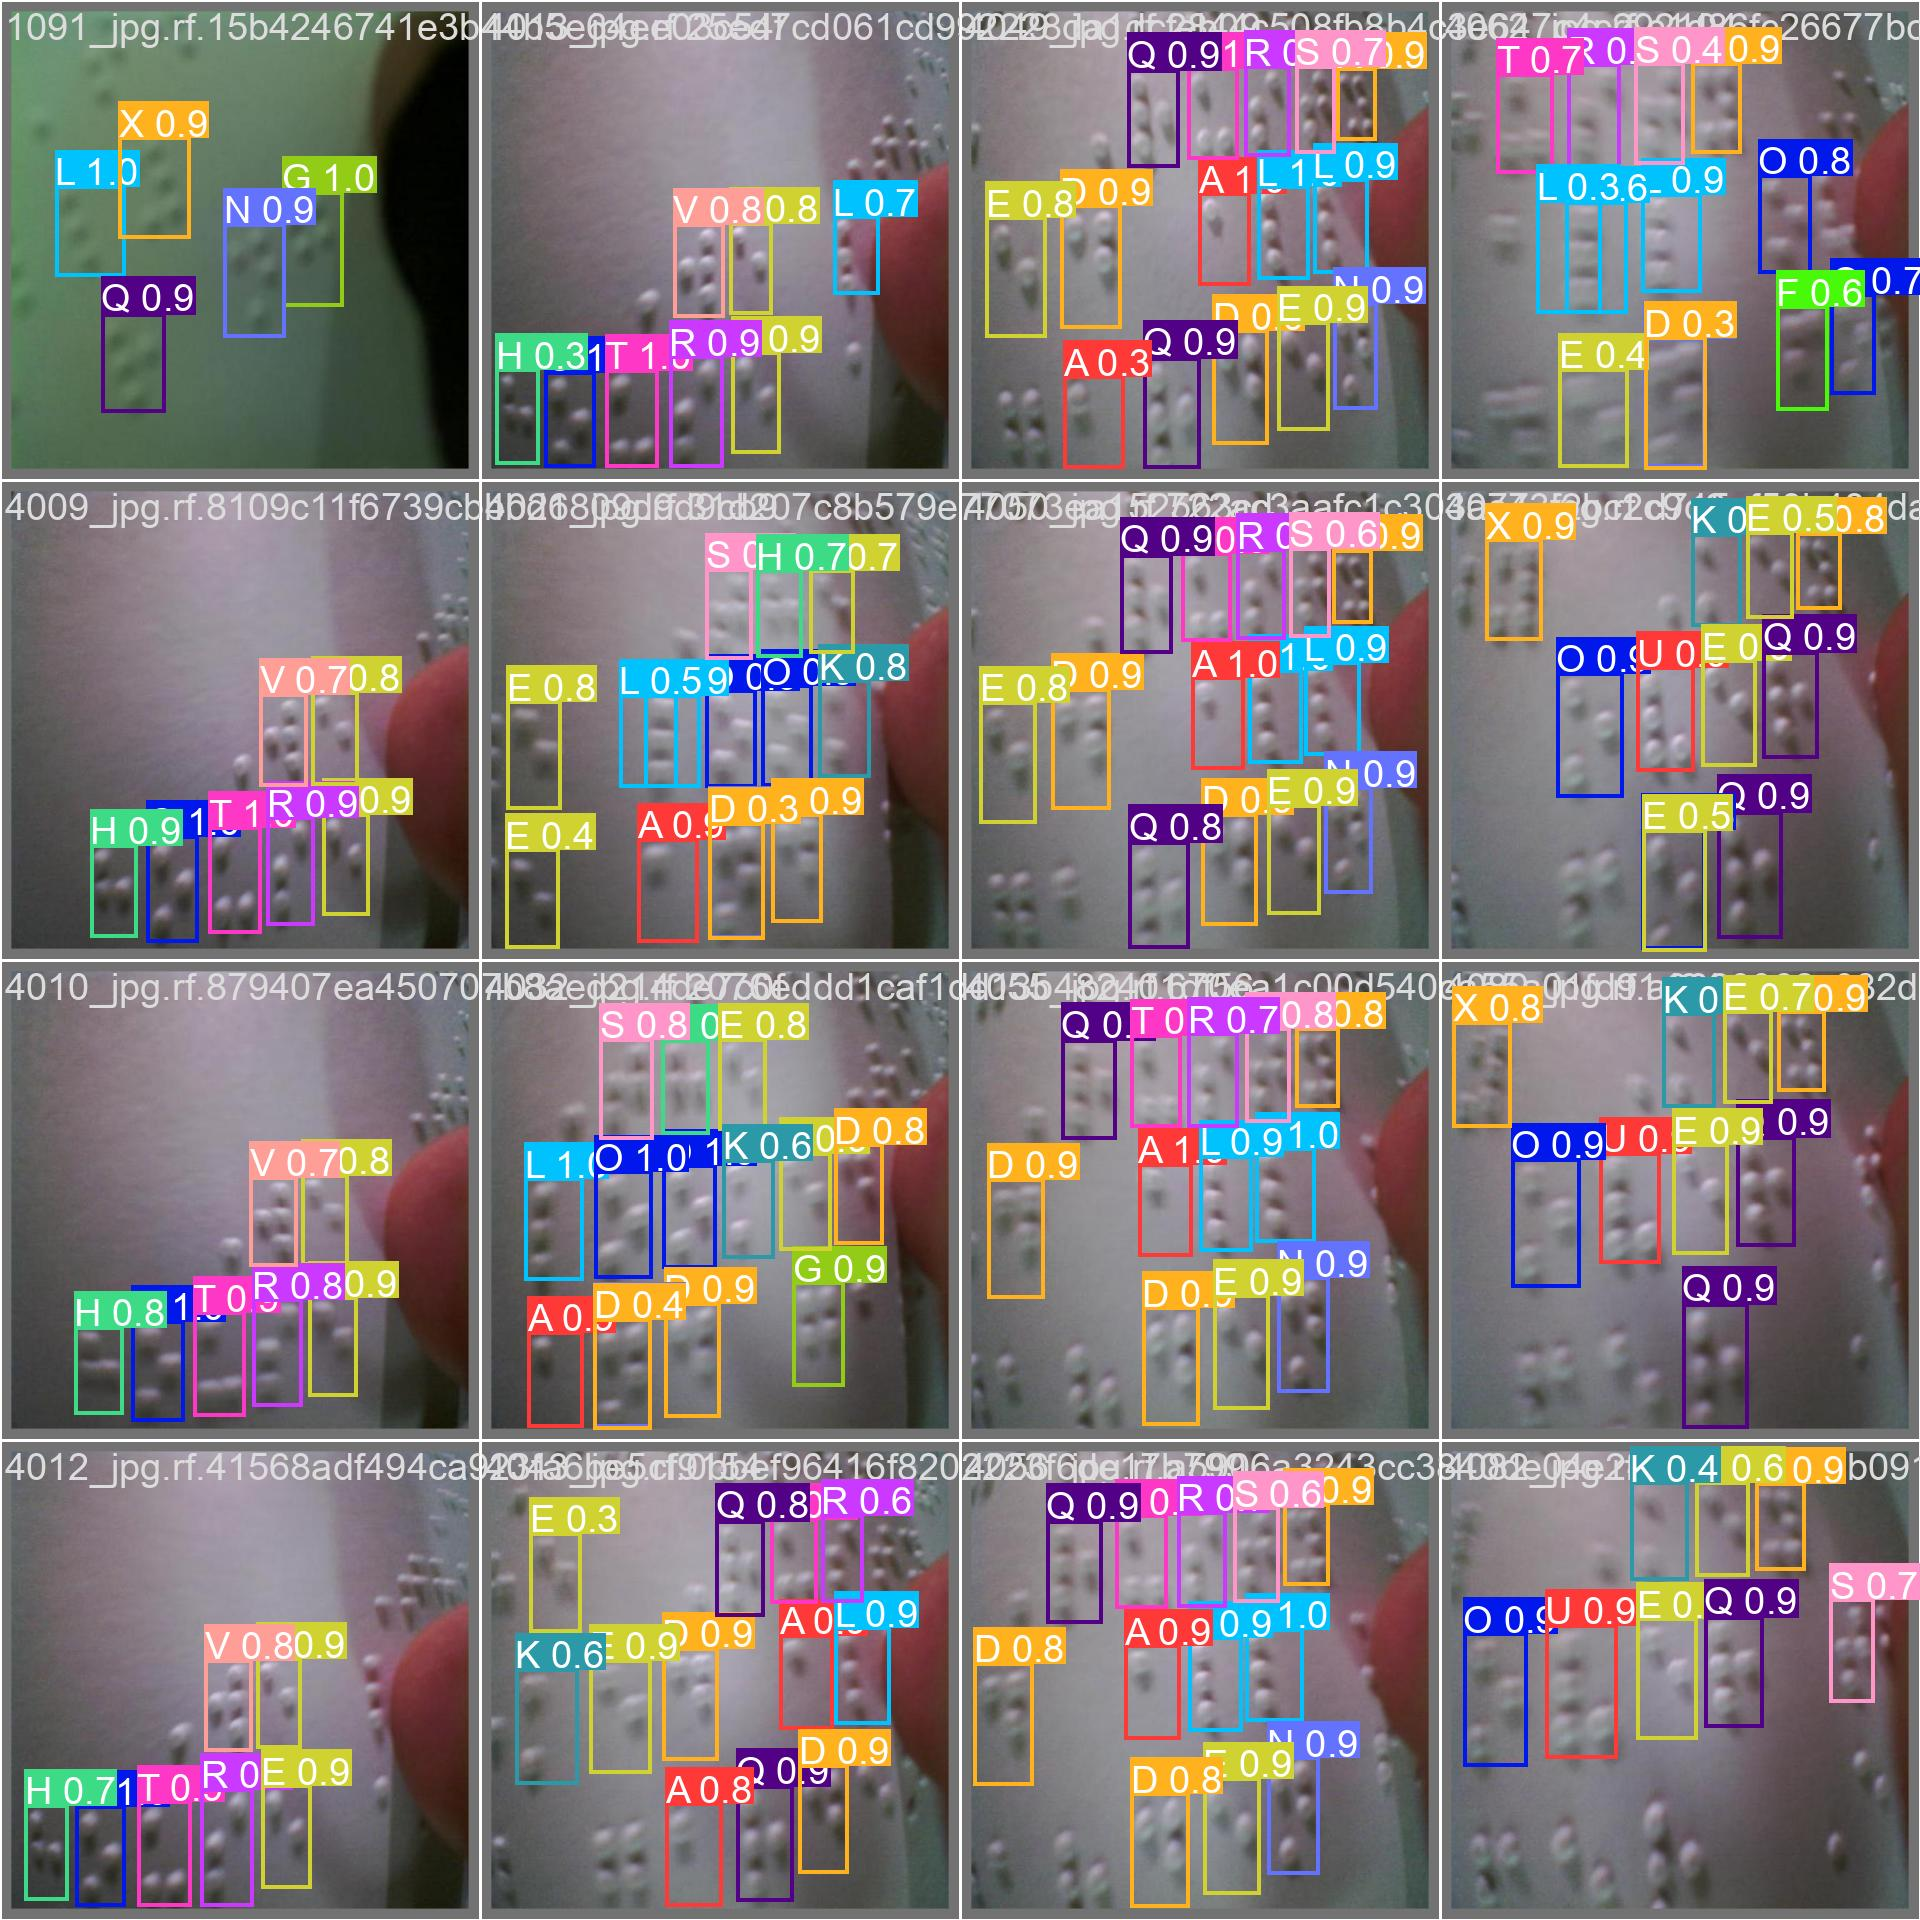

In [ ]:
Image(filename="/content/runs/detect/val/val_batch0_pred.jpg")